# Initialisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.linear_model import LinearRegression

<img src="./img/fig2.jpg" alt="Drawing" style="width: 300px;"/>

# Import data

In [2]:
# df = pd.read_csv("data/data_MRU.csv",sep = ';')
df = pd.read_excel("./fichiers_input/Exemple_01_cinematique_MRU_data.xlsx")
df

,t,x
0,0.05,2.00
1,0.10,4.05
2,0.15,6.20
3,0.20,8.10
4,0.25,10.20
5,0.30,12.20
6,0.35,14.20
7,0.40,16.30
8,0.45,18.30
9,0.50,20.35


In [52]:
print('yo')

yo


In [39]:
df.columns

Index(['t', 'x'], dtype='object')

In [40]:
df.dtypes

t    float64
x    float64
dtype: object

In [41]:
xdata = list(df["t"])
ydata = list(df["x"])
xdata

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

# Graphique 

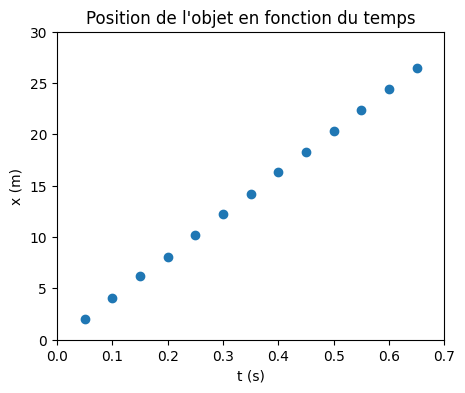

In [42]:
# Création de l'objet graphique:
fig, ax = plt.subplots()

# Nuage de point:
ax.scatter(xdata, ydata)

# Titre:
ax.set_title("Position de l'objet en fonction du temps")

# Nom des axes:
ax.set_xlabel("t (s)")
ax.set_ylabel("x (m)")

# Domaine:
ax.set(xlim=(0, 0.7), ylim=(0, 30))

# Dimension de l'image:
width = 5
height = 4
fig.set_size_inches(width, height)

plt.savefig('graph1.pdf')
plt.show()

# Régression Linéaire

In [43]:
x = np.array(xdata).reshape((-1, 1))
y = np.array(ydata)

model = LinearRegression().fit(x,y)

a = model.coef_[0]
b = model.intercept_
r_sq = model.score(x, y)

print(f"pente: {a}")
print(f"ordonnée à l'origine: {b}")
print(f"coefficient of détermination R^2: {r_sq}")

pente: 40.692307692307686
ordonnée à l'origine: 3.552713678800501e-15
coefficient of détermination R^2: 0.999978559712986


# Analyse des pentes extrêmes

In [44]:
def fct_delta_a(a, b, x1, x2, delta_x1, delta_x2, delta_y1, delta_y2):
    y1 = a*x1+b
    y2 = a*x2+b
    return abs(a)*((delta_y2+delta_y1)/abs(y2-y1)+(delta_x2+delta_x1)/abs(x2-x1))
 
def fct_delta_b(a, delta_a, x1, delta_x1, delta_y1):
    return delta_y1 + abs(x1)*delta_a + abs(a)*delta_x1

In [46]:
x1, x2 = 0.05, 0.65
y1, y2 = a*x1+b, a*x2+b
delta_x1, delta_x2 = .01, .01,
delta_y1, delta_y2 = .5, .5

delta_a = fct_delta_a(a, b, x1, x2, delta_x1, delta_x2, delta_y1, delta_y2)
delta_b = fct_delta_b(a, delta_a, x1, delta_x1, delta_y1)

print(f"delta_a: {delta_a}")
print(f"delta_b: {delta_b}")

delta_a: 3.023076923076923
delta_b: 1.0580769230769231


# Graphique avec régression linéaire

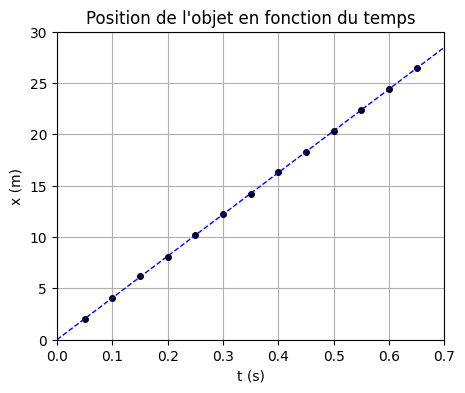

In [47]:
# Création de l'objet graphique:
fig, ax = plt.subplots()

plt.grid()

# Data:
ax.plot(xdata, ydata, 'o', color='black', markersize=4)

#Modele:
xmin, xmax = 0, 0.7
ax.plot([xmin, xmax], [a*xmin+b, a*xmax+b], 'b--', linewidth=1)

# Titre:
ax.set_title("Position de l'objet en fonction du temps")

# Nom des axes:
ax.set_xlabel("t (s)")
ax.set_ylabel("x (m)")

# Domaine:
ax.set(xlim=(0, 0.7), ylim=(0, 30))

# Dimension de l'image:
width = 5
height = 4
fig.set_size_inches(width, height)


plt.savefig('./fichiers_output/Exemple_01_cinematique_MRU_graphique_1.pdf')
plt.show()

# Graphique avec régression linéaire et pentes extrêmes 

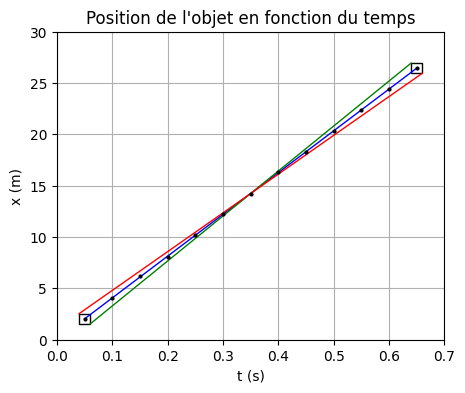

In [48]:
# Création de l'objet graphique:
fig, ax = plt.subplots()

plt.grid()

# Nuage de point:
ax.plot([x1, x2], [y1, y2], 'b-', linewidth=1)
ax.plot([x1 + delta_x1, x2 - delta_x2], [y1 - delta_y1, y2 + delta_y2], 'g-', linewidth=1)
ax.plot([x1 - delta_x1, x2 + delta_x2], [y1 + delta_y1, y2 - delta_y2], 'r-', linewidth=1)
ax.plot(xdata, ydata, 'o', color='black', markersize=2)


ax.add_patch(Rectangle((x1 - delta_x1, y1 - delta_y1), 2*delta_x1, 2*delta_y1,
             edgecolor = 'black',
             fill=False,
             lw=1))
ax.add_patch(Rectangle((x2 - delta_x2, y2 - delta_y2), 2*delta_x2, 2*delta_y2,
             edgecolor = 'black',
             fill=False,
             lw=1))

# Titre:
ax.set_title("Position de l'objet en fonction du temps")

# Nom des axes:
ax.set_xlabel("t (s)")
ax.set_ylabel("x (m)")

# Domaine:
ax.set(xlim=(0, 0.7), ylim=(0, 30))

# Dimension de l'image:
width = 5
height = 4
fig.set_size_inches(width, height)


plt.savefig('./fichiers_output/Exemple_01_cinematique_MRU_graphique_2.pdf')
plt.show()

# Graphique de comparaison

In [49]:
aref = 40 
delta_aref = 1

agraph = a
delta_agraph = delta_a

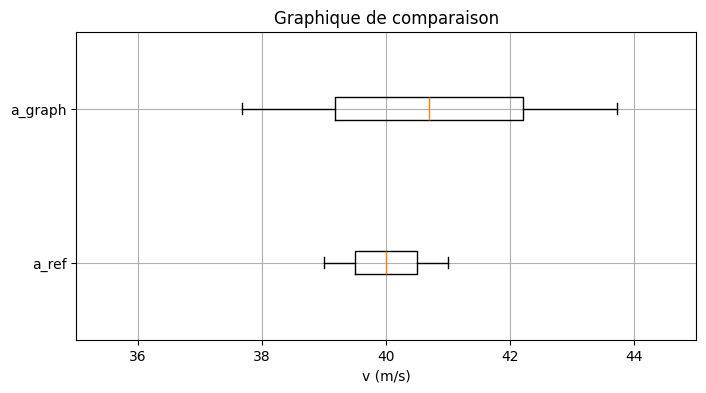

In [50]:
fig, ax = plt.subplots()
plt.grid()
ax.set_title('Graphique de comparaison')

data = np.array([[aref - delta_aref, agraph - delta_agraph],[aref + delta_aref, agraph + delta_agraph]])
ax.boxplot(data, showfliers=False, vert=False, labels = ["a_ref","a_graph"])

ax.set_xlabel("v (m/s)")


width = 8
height = 4
fig.set_size_inches(width, height)


ax.set(xlim=(35, 45))

plt.savefig('./fichiers_output/Exemple_01_cinematique_MRU_graphique_comparaison.pdf')

In [9]:
import sys
import time

# Fonction pour imprimer dynamiquement sur la même ligne
def print_dynamic(text):
    sys.stdout.write('\r' + text)
    sys.stdout.flush()

# Exemple d'utilisation
for i in range(11):
    print_dynamic("Progress: {}%".format(i*10))
    time.sleep(1)  # Ajout d'un délai simulé

Progress: 100%

In [15]:
import time

# Exemple d'utilisation
for i in range(10):
    print("Progress: {}%".format(i*10), end='\r')
    time.sleep(1)  # Ajout d'un délai simulé

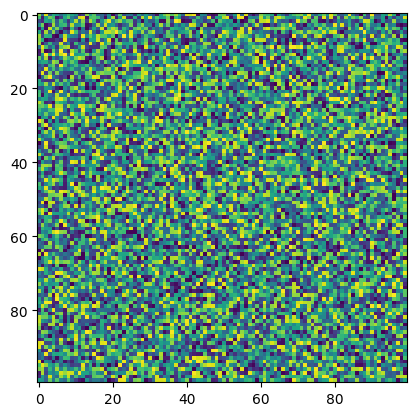

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import time

def show_dynamic_image(image):
    plt.figure()
    img_plot = plt.imshow(image)
    plt.show(block=False)  # Affichage non bloquant pour permettre les mises à jour

    for i in range(10):  # Exemple de mise à jour dynamique
        # Mise à jour de l'image
        new_image = np.random.rand(100, 100)  # Exemple de nouvelle image (ici aléatoire)
        img_plot.set_data(new_image)
        plt.pause(1)  # Délai d'attente (secondes)
        plt.draw()

    plt.close()  # Fermer la fenêtre une fois que les mises à jour sont terminées

# Exemple d'utilisation
image = np.random.rand(100, 100)  # Image aléatoire de taille 100x100
show_dynamic_image(image)


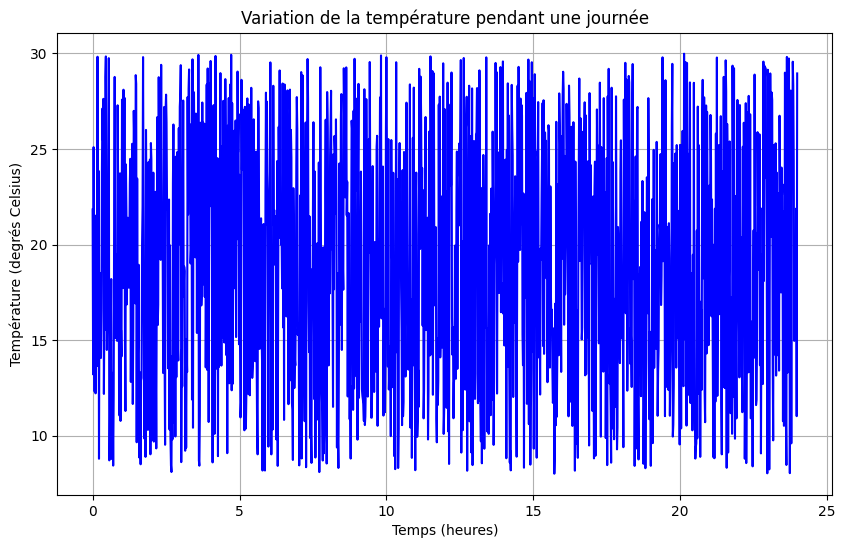

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Définition de la plage horaire (de minuit à minuit)
start_time = 0
end_time = 24 * 60  # Nombre de minutes dans une journée (1440 minutes)

# Génération des temps (une minute d'intervalle)
time_points = np.arange(start_time, end_time, 1)

# Génération aléatoire des températures entre 8 et 30 degrés Celsius
temperatures = np.random.uniform(8, 30, len(time_points))

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(time_points / 60, temperatures, color='blue')
plt.title('Variation de la température pendant une journée')
plt.xlabel('Temps (heures)')
plt.ylabel('Température (degrés Celsius)')
plt.grid(True)
plt.show()


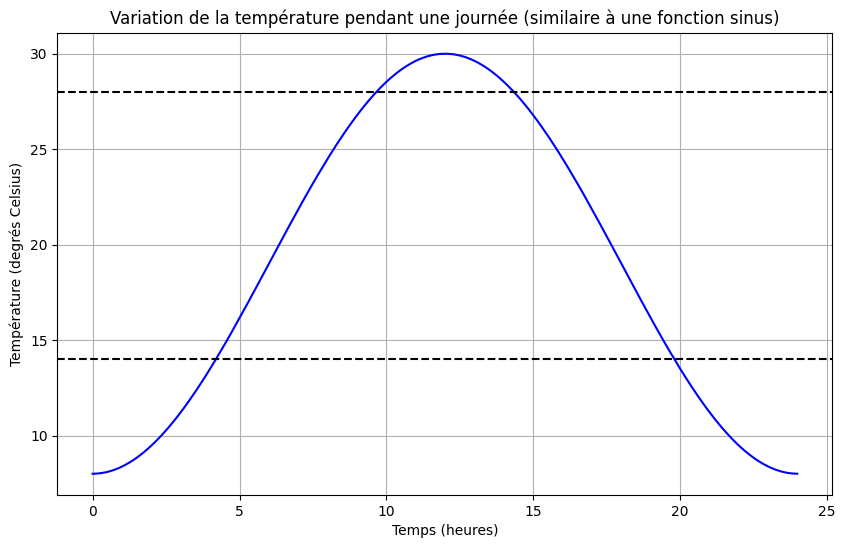

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Définition de la plage horaire (de minuit à minuit)
start_time = 0
end_time = 24 * 60  # Nombre de minutes dans une journée (1440 minutes)

# Génération des temps (une minute d'intervalle)
time_points = np.arange(start_time, end_time, 1)

# Génération de la variation de température similaire à une fonction sinus
# En ajustant l'amplitude et la phase, vous pouvez contrôler l'apparence de la variation de température
amplitude = 11  # Amplitude de la variation de température
phase = np.pi*(3/2)   # Décalage de phase
temperature_variation = np.round(amplitude * np.sin(2 * np.pi * time_points / end_time + phase) + 19, 3)  # Ajout d'une température moyenne de 19 degrés


# Joindre les tableaux temperature_variation et time_points ensemble
data = np.column_stack((time_points,temperature_variation))

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(time_points / 60, temperature_variation, color='blue')
plt.title('Variation de la température pendant une journée (similaire à une fonction sinus)')
plt.xlabel('Temps (heures)')
plt.ylabel('Température (degrés Celsius)')
plt.axhline(y=14, color='black', linestyle='--', label='Chauffage')  # Ajoute une ligne pointillée à 14 degrés pour indiquer le chauffage
plt.axhline(y=28, color='black', linestyle='--', label='Refroidissement')  # Ajoute une ligne pointillée à 28 degrés pour indiquer le refroidissement
plt.grid(True)
plt.show()


In [95]:
time_index = start_time
while True:
    # Récupère la température mesurée à l'index de temps actuel:
    temperature_mesuree = data[time_index][1]

    # Ajuste l'état du système de contrôle de température en fonction de la température mesurée:
    if temperature_mesuree <= 14:
        etat_systeme_temperature_controle = "chauffage"
    elif 14 < temperature_mesuree < 28:
        etat_systeme_temperature_controle = "éteint"
    else:
        etat_systeme_temperature_controle = "refroidissement"

    # Affiche dynamiquement le temps, la température mesurée et l'état du système de contrôle de température
    print_dynamic(f'Temps: {data[time_index][0]} min ; Température : {data[time_index][1]:.3f} degré celsius ;  État système contrôle température : {etat_systeme_temperature_controle}')

    # Pause l'exécution du programme pendant un court laps de temps simulé (en secondes) pour simuler l'attente entre chaque mesure de température.
    time.sleep(.001)

    # Incrémente l'index de temps pour passer au prochain intervalle de temps.
    time_index += 1

    # Vérifie si la plage horaire définie a été entièrement parcourue
    if time_index == end_time:
        # Affiche un message indiquant que le système de contrôle de température a fonctionné aujourd'hui
        print_dynamic("Le système de contrôle de température a fonctionné aujourd'hui!")
        break  # Termine la boucle et arrête l'exécution du programme


   

Le système de contrôle de température a fonctionné aujourd'hui!

In [91]:
import sys 
from IPython.display import clear_output

def print_dynamic(text):
    clear_output(wait=True)
    sys.stdout.write('\r' + text)
    sys.stdout.flush()
    